In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils/")
from train_tools import pre_process, train_qg_pfn
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
base_dir = "/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/"
fname_gg = base_dir+'H2gg-CF3.0CA3.0-sg0100-esg0000/total.root'
fname_qq = base_dir+'H2gg-CF3.0CA3.0-sg0100-esg0011/total.root'

In [4]:
#loading in data and labels 
X, Y = pre_process(fname_qq,fname_gg,nev_max=75000)

Loaded files at 0.1574704647064209
Read in arrays at 2.8088901042938232
Limited max events at 2.808979034423828
Cleaned events at 2.927107095718384
Made quark/gluon input arrays at 7.906630992889404
Finished preprocessing at 17.809229612350464


In [13]:
optimal = np.array([1+np.sum([p[0]**2 if p[0] > 0 else 0 for p in jet]) for jet in X])
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
Y2 = [y[1] for y in Y]
q_mask = [y==1 for y in Y2]
g_mask = [y==0 for y in Y2]
print(optimal_auc)

0.7523649779508617


In [8]:
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=5,nev_max=75000)

Loaded files at 0.15615510940551758
Read in arrays at 2.88843035697937
Limited max events at 2.888519763946533
Cleaned events at 3.006676435470581
qmaxmult = 18, gmaxmult = 14
Made quark/gluon input arrays at 8.660096883773804
Finished preprocessing at 18.90781307220459
Done train/val/test split at 18.93888759613037
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 100)    0           tdist_0[

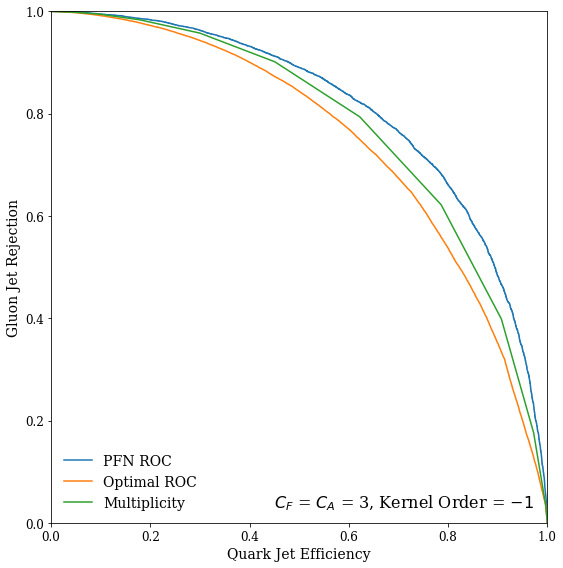

In [14]:
pfn_roc = pfn_out[1][0]
mult_roc = pfn_out[3][0]

plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

pfn_fp, pfn_tp, threshs = pfn_roc
opt_fp, opt_tp, opt_thresh = optimal_roc
mult_fp, mult_tp, mult_thresh = mult_roc
plt.plot(pfn_tp, 1-pfn_fp, '-', label='PFN ROC')
plt.plot(opt_tp,1-opt_fp,"-",label="Optimal ROC")
plt.plot(1-mult_tp,mult_fp,"-",label="Multiplicity")

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=14)
plt.text(0.45,0.03,r"$C_F$ = $C_A$ = 3, Kernel Order = $-1$",fontsize=16)
plt.show()

In [12]:
mult = np.array([np.sum([1 if p[0] > 0 else 0 for p in jet]) for jet in X])

(array([0.0000e+00, 2.0052e+04, 2.3582e+04, 2.3414e+04, 6.7250e+03,
        7.9900e+02, 3.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Patch objects>)

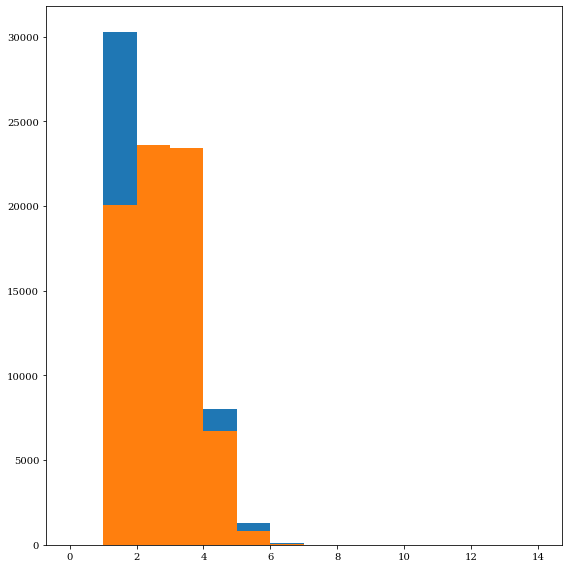

In [45]:
plt.hist(mult[q_mask],bins=np.arange(0,15))
plt.hist(mult[g_mask],bins=np.arange(0,15))